<font color="red" size="7">Dimensionality Reduction</font>

<font color="red" size="5">8.Independent Component Analysis (ICA)</font>

**Independent Component Analysis (ICA)** is a computational technique used for separating a multivariate signal into additive, statistically independent components. It is primarily used in signal processing and data analysis where you want to recover signals or factors that are statistically independent of each other from observed mixed signals. ICA is particularly useful in scenarios like blind source separation (e.g., separating different audio sources from a mixed recording or separating financial signals in economic data).

ICA assumes that the observed data are linear mixtures of independent sources, and the goal is to estimate the independent components (sources) that generated the observed data.

<font color = 'yellow'>ICA vs PCA</font>

<ol>
<li>PCA finds the directions of maximum variance and performs linear transformations to reduce dimensionality. It focuses on uncorrelated components, but they may still have dependencies.</li>
    
<li>ICA, on the other hand, separates components that are statistically independent. It goes beyond uncorrelation to exploit higher-order dependencies and typically works better when the sources are truly independent.</li></ol>

<font color = 'yellow'>Steps in ICA</font>

<ol>
<li>Standardize the Data: Like PCA, ICA typically assumes the data are centered (zero mean) and often requires scaling or whitening.</li>
<li>Whitening: Whitening is a process where the data is transformed so that its components are uncorrelated and have unit variance. This simplifies the ICA problem by making the mixing matrix diagonal.</li>
<li>Independence Maximization: ICA uses an optimization approach (often based on maximizing non-Gaussianity) to recover the independent components.</li>
<li>Reconstruction: Once the independent components are estimated, the original sources can be reconstructed.</li></ol>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
import seaborn as sns
import pandas as pd

In [2]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
# Apply ICA to reduce the data to 2 independent components
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

In [4]:
# Create a DataFrame for visualization
import pandas as pd
ica_df = pd.DataFrame(data=X_ica, columns=['ICA1', 'ICA2'])
ica_df['target'] = y


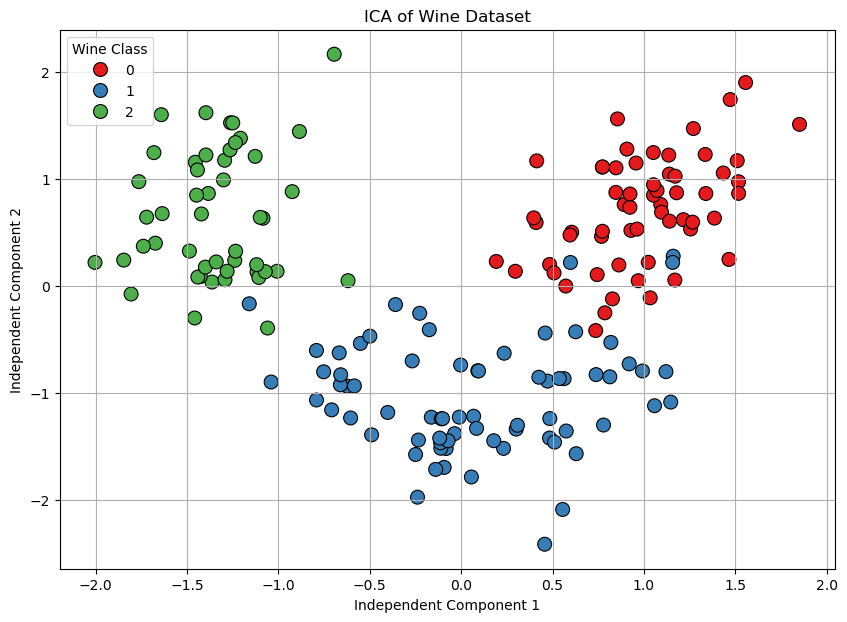

In [5]:
# Plot the results
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='ICA1', y='ICA2', hue='target', palette='Set1', data=ica_df,
    s=100, edgecolor='k'
)
plt.title('ICA of Wine Dataset')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.legend(title='Wine Class')
plt.grid()
plt.show()


In [6]:
# Display the ICA components (the independent components)
ica_components = ica.components_
ica_components_df = pd.DataFrame(ica_components, columns=feature_names)
print("ICA Components:\n", ica_components_df)

ICA Components:
     alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  0.036793   -0.126190 -0.020175          -0.109166   0.046918   
1  0.311053    0.130817  0.199003          -0.017279   0.195035   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.177129    0.194265             -0.138731         0.141423   
1       0.058463    0.016631              0.004895         0.038650   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -0.072913  0.153138                      0.182612  0.109369  
1         0.329919 -0.162739                     -0.086943  0.242565  


In [7]:
ica_components_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.036793,-0.126190,-0.020175,-0.109166,0.046918,0.177129,0.194265,-0.138731,0.141423,-0.072913,0.153138,0.182612,0.109369
1,0.311053,0.130817,0.199003,-0.017279,0.195035,0.058463,0.016631,0.004895,0.038650,0.329919,-0.162739,-0.086943,0.242565


**Advantages of ICA**

<ol>
<font color = 'yellow'><li>Separation of Independent Sources:</font>
    ICA is excellent for separating sources that are statistically independent. It can recover the original signals even when mixed.</li>
<font color = 'yellow'><li>Application to Non-Gaussian Data:</font> 
        Unlike PCA, ICA works well with non-Gaussian data, making it suitable for a broader range of applications.</li>
<font color = 'yellow'><li>Useful in Signal Processing:</font> 
        ICA is widely used in signal processing, especially for blind source separation problems (e.g., separating audio sources or financial signals).</li></ol>

**Limitations of ICA**

<ol>
<font color = 'yellow'><li>Non-Gaussian Assumption:</font>
    ICA relies heavily on the assumption that the sources are non-Gaussian. If the data does not meet this assumption, ICA may not perform well.</li>
<font color = 'yellow'><li>Sensitivity to Initialization:</font>
    ICA algorithms (especially gradient-based ones) can be sensitive to initialization and might converge to different solutions based on initial conditions.</li>
<font color = 'yellow'><li>Linear Mixing Model:</font> 
    ICA assumes that the data is a linear mixture of sources. If the mixing process is nonlinear, ICA may fail to separate the sources effectively.</li></ol>

**Applications of ICA**

<ol>
<font color = 'yellow'><li>Audio Signal Separation:</font> 
    ICA is widely used in the cocktail party problem, where different audio signals (e.g., voices) are mixed in a recording, and the goal is to separate them.</li>
<font color = 'yellow'><li>Neuroscience:</font>  
    ICA is used to analyze EEG and fMRI data to separate independent brain signals.</li>
<font color = 'yellow'><li>Financial Data Analysis:</font> 
    ICA is applied to extract independent financial factors affecting stock prices or economic movements.</li>
<font color = 'yellow'><li>Image Processing:</font> 
    ICA is also used for extracting independent features or components from images or video data.</li></ol>